In [1]:
import pandas as pd                       # Importing packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename='Copy of Telco-Customer-Churn.xlsx'
df=pd.read_excel(filename)

# *Checking for null values*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# *Examining the columns using aggregation*

In [4]:
df.value_counts('gender')

gender
Male      3555
Female    3488
dtype: int64

In [5]:
df.value_counts('SeniorCitizen')

SeniorCitizen
0    5901
1    1142
dtype: int64

**Assuming that the value of 1 indicates senior citizen, and value of 0 indicates non-senior citizen**

In [6]:
df.value_counts('PaymentMethod')

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
dtype: int64

# *Filtering columns only needed in most of our analysis*

In [7]:
x=df.loc[: ,['gender','SeniorCitizen','Contract','Churn','PaymentMethod']]

# _1.Churn count with respect to gender_

In [8]:
churn_fil=x['Churn']=='Yes'
gender_fil=x['gender']=='Female'
p=x.loc[churn_fil & gender_fil, : ]
q=x.loc[ churn_fil & ~gender_fil, : ]
churn_ct_f_Idx=p.index
churn_ct_f=len(churn_ct_f_Idx)

churn_ct_m_Idx=q.index
churn_ct_m=len(churn_ct_m_Idx)

x1=[churn_ct_f,churn_ct_m ]
print(churn_ct_f)
print(churn_ct_m)

939
930


# *Plotting the churn plot based on gender*

([<matplotlib.axis.YTick at 0x1f410335190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

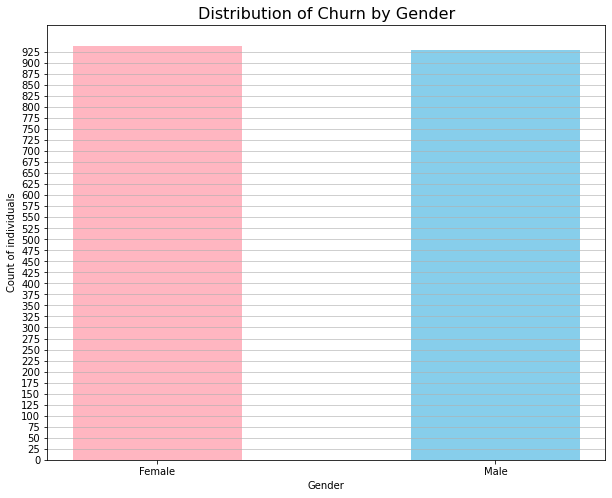

In [9]:
import numpy as np
bars=('Female','Male')
vara=np.arange(len(bars))

width=0.5
plt.figure(figsize=(10,8))
plt.bar(vara,x1,color=['lightpink','skyblue'], width=width)
plt.grid(axis='y', alpha = 0.75)
plt.title('Distribution of Churn by Gender',fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count of individuals')
plt.xticks(vara,bars)
#plt.yticks()
plt.yticks(np.arange(0, max(x1)+1, 25))

# *Finding the total number of female senior citizens who are in this study sample*

In [10]:
senior_cit_fil=x['SeniorCitizen']==1
r=x.loc[senior_cit_fil & gender_fil ,:]
senior_cit_fem_Idx=r.index
print("The number of female senior citizens in the study", len(senior_cit_fem_Idx))


The number of female senior citizens in the study 568


# *3. To plot the Total Charges against the tenure, we convert the fields tenure and Total Charges from data to float*

In [11]:
df['tenure']=pd.to_numeric(df['tenure'],downcast="float",errors='coerce')
df['tenure'].isna().sum()

0

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float", errors='coerce')
df['TotalCharges'].isna().sum()

11

**It is observed that 11 of the values of the column TotalCharges was converted to nulls. Therefore, replacing the null values with the average of all the value of the TotalCharges column**

In [13]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace = True)

**Verifying that all the nulls have been replaced with floating points**

In [14]:
df['TotalCharges'].isna().sum()

0

**Plotting the values as required**

Text(0, 0.5, 'Total Charges')

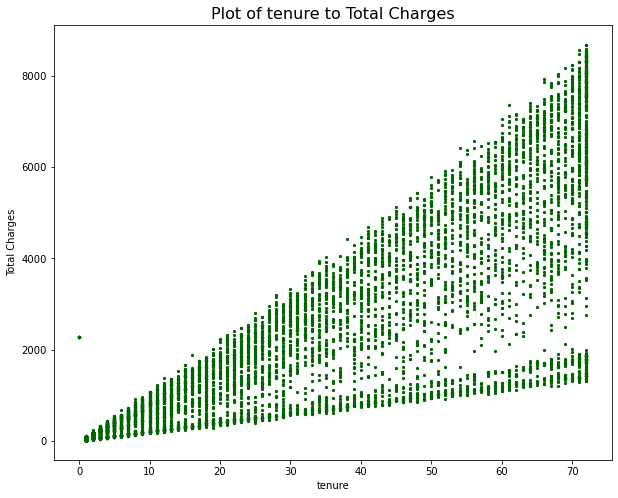

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df['tenure'],df['TotalCharges'],s=5,color='darkgreen')
plt.title("Plot of tenure to Total Charges", fontsize=16)
plt.xlabel("tenure")
plt.ylabel("Total Charges")

# *4.Creating a filter for senior citizens, to plot the type of contract most common with them*

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

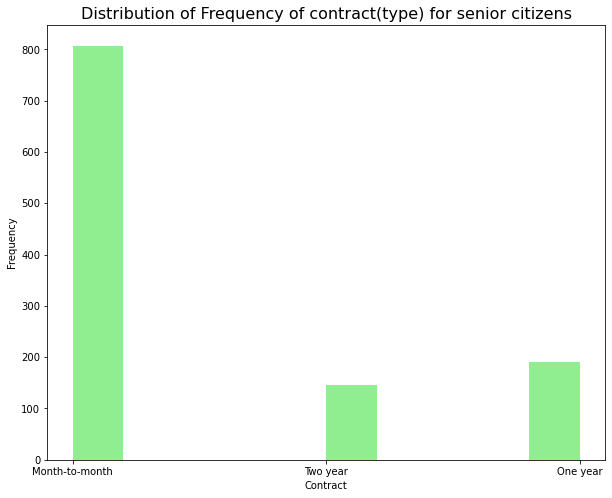

In [16]:
s=x.loc[senior_cit_fil, : ]
plt.figure(figsize=(10,8))
plt.hist(s['Contract'],color='lightgreen')
plt.title("Distribution of Frequency of contract(type) for senior citizens", fontsize=16)
plt.xlabel("Contract")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()

# *5.Here we focus on the distribution of payment method for non-senior citizens who are male, non-senior citizens who are female, senior citizens who are male and senior citizens who are females*

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

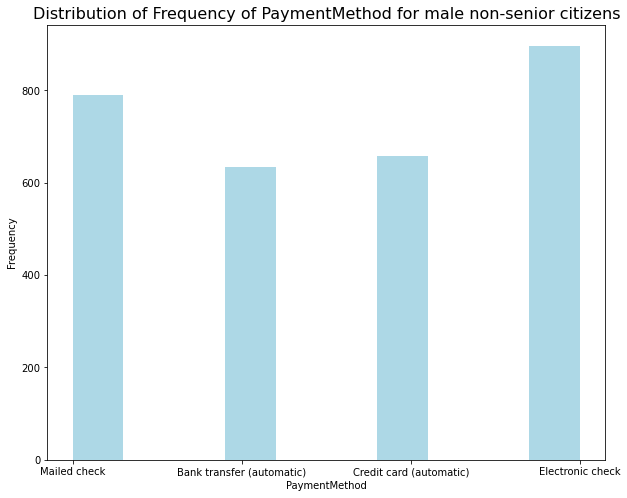

In [17]:
l=x.loc[~senior_cit_fil & ~gender_fil ,:]
plt.figure(figsize=(10,8))
plt.hist(l['PaymentMethod'],color='lightblue')
plt.title("Distribution of Frequency of PaymentMethod for male non-senior citizens", fontsize=16)
plt.xlabel("PaymentMethod")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

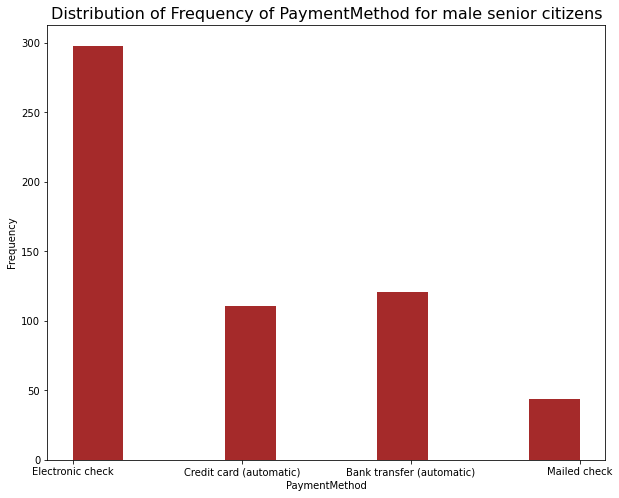

In [18]:
m=x.loc[senior_cit_fil & ~gender_fil ,:]
plt.figure(figsize=(10,8))
plt.hist(m['PaymentMethod'],color='brown')
plt.title("Distribution of Frequency of PaymentMethod for male senior citizens", fontsize=16)
plt.xlabel("PaymentMethod")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

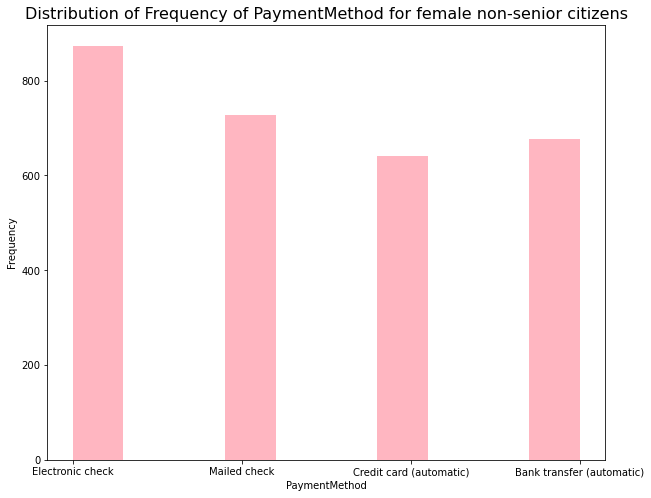

In [19]:
n=x.loc[~senior_cit_fil & gender_fil ,:]
plt.figure(figsize=(10,8))
plt.hist(n['PaymentMethod'],color='lightpink')
plt.title("Distribution of Frequency of PaymentMethod for female non-senior citizens", fontsize=16)
plt.xlabel("PaymentMethod")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

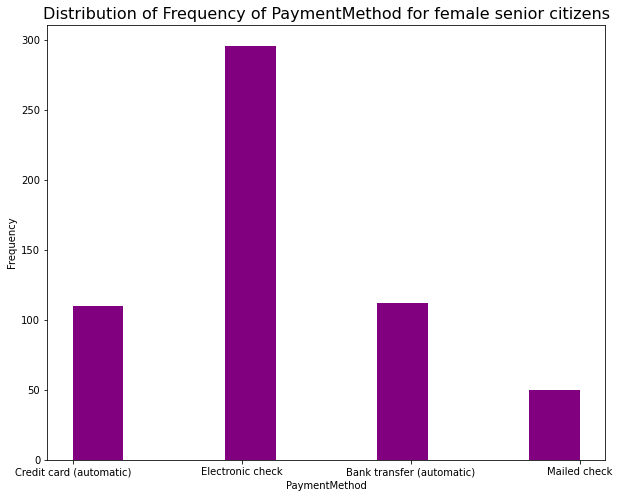

In [20]:
plt.figure(figsize=(10,8))
plt.hist(r['PaymentMethod'],color='purple')
plt.title("Distribution of Frequency of PaymentMethod for female senior citizens", fontsize=16)
plt.xlabel("PaymentMethod")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()

# *5.(different views of payment data) Other plots below, are plot of payment methods for each of the three types of contracts: Month-to-month , one-year, and two-year contracts in that order*

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

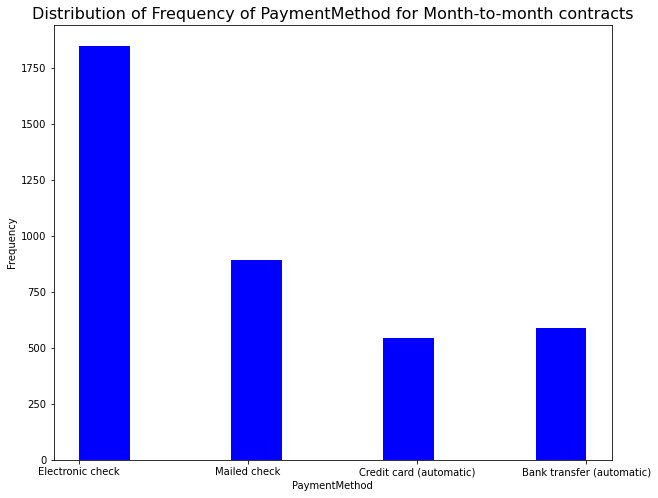

In [21]:
contract_fil_mtm=x['Contract']=="Month-to-month"
u=x.loc[contract_fil_mtm, :]
plt.figure(figsize=(10,8))
plt.hist(u['PaymentMethod'],color='blue')
plt.title("Distribution of Frequency of PaymentMethod for Month-to-month contracts", fontsize=16)
plt.xlabel("PaymentMethod")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

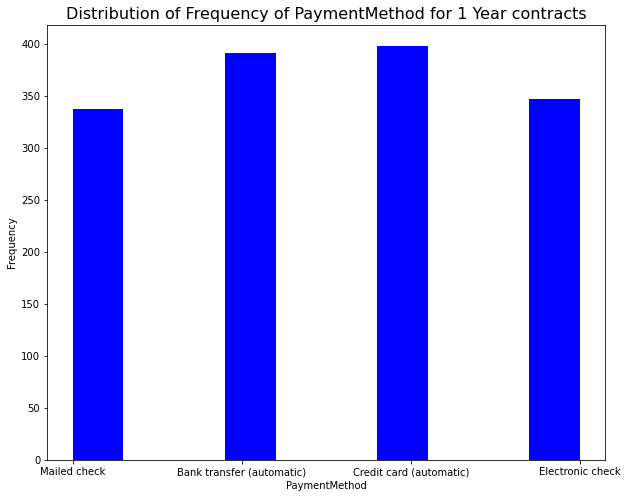

In [22]:
contract_fil_1yr=x['Contract']=="One year"
v=x.loc[contract_fil_1yr, :]
plt.figure(figsize=(10,8))
plt.hist(v['PaymentMethod'],color='blue')
plt.title("Distribution of Frequency of PaymentMethod for 1 Year contracts", fontsize=16)
plt.xlabel("PaymentMethod")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

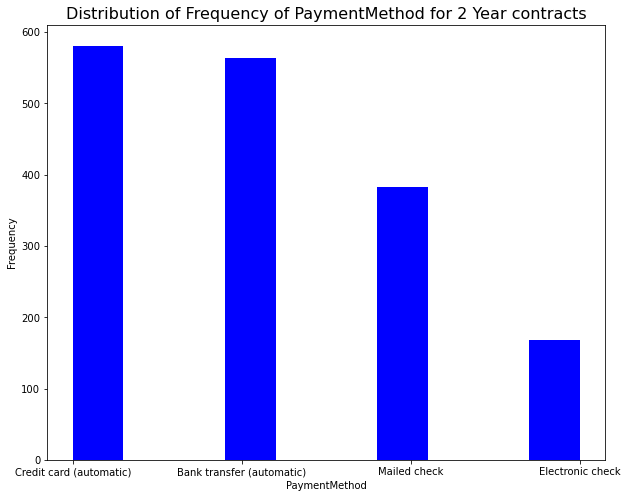

In [23]:
contract_fil_2yr=x['Contract']=="Two year"
w=x.loc[contract_fil_2yr, :]
plt.figure(figsize=(10,8))
plt.hist(w['PaymentMethod'],color='blue')
plt.title("Distribution of Frequency of PaymentMethod for 2 Year contracts", fontsize=16)
plt.xlabel("PaymentMethod")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()

# Notable observations concerning payment methods are:
    Senior citizens prefer the electronic payment method in both gender categories
    Two year contracts have almost equal distribution of credit card method, and bank transfer method
    Overall, Electronic check is the most favoured payment method among all groups and across all groups